# Pandas Intermediate to Advance

**What's covered?**

**1. Combining Data From Multiple Tables using pd.merge() Function**

    how argument
    Learning with Two Example DataFrame
    Applying Inner Join
    Applying Left Join
    Applying Right Join
    Applying Outer Join
    Applying Cross Join
    
**2. Brief primer on merge methods (relational algebra)**

    Solving a Case Study by Joining Multiple Tables
    Reading .csv Files - customer_data.csv, product_data.csv and purchase_data.csv
    Joining Purchase Table with Customer and Product Table
    Generating Basic Reports on the Data
    
**3. Visual Data Analysis using Pandas (Plotting)**

    Reading .csv File - Iris Data
    Histogram Plot
    KDE Plot
    Box Plot
    Vertical and Horizontal Bar Plot
    Scatter Plot

# Combining Data From Multiple Tables using pd.merge() Function

pandas has full-featured, **high performance in-memory join operations** idiomatically very similar to relational databases like SQL.

pandas provides a single function, **merge()**, as the entry point for all standard database join operations between DataFrame or named Series objects:

**Question: How to combine data from multiple tables?**
    
**Answer:** Multiple tables can be concatenated both column wise and row wise as database-like join/merge operations are provided to combine multiple tables of data.

**Remember**

    1. Multiple tables can be concatenated both column-wise and row-wise using the concat function.
    2. For database-like merging/joining of tables, use the merge function.

**Syntax**

pd.merge(left, right, how='inner', on=None)

In [1]:
import pandas as pd
import numpy as np

**Syntax : pd.merge(left,right, how = 'inner', on= None)**

In [15]:
left = pd.DataFrame({"key":["K0","K1","K2"],
        "c":["c1","c2","c3"]})
left

,key,c
0,K0,c1
1,K1,c2
2,K2,c3


In [16]:
right = pd.DataFrame({"key":["K0","K1","K2"],
         "a":["a1","a2","a3"]})
right

,key,a
0,K0,a1
1,K1,a2
2,K2,a3


In [17]:
result = pd.merge(left,right, on ="key")

In [18]:
result

,key,c,a
0,K0,c1,a1
1,K1,c2,a2
2,K2,c3,a3


In [2]:
left = pd.DataFrame({"key1":["k0","k0","k1","k2"],
                   "key2":["k0","k1","k0","k1"],
                   "C":["c0","c1","c2","c3"],
                   "D":["d0","d1","d2","d3"]})

In [3]:
right=pd.DataFrame({"key1":["k0","k1","k1","k2"],
                   "key2":["k0","k0","k0","k0"],
                   "A":["a0","a1","a2","a3"],
                   "B":["b0","b1","b2","b3"]})

In [4]:
result = pd.merge(left, right, on=["key1", "key2"])

In [5]:
result

,key1,key2,C,D,A,B
0,k0,k0,c0,d0,a0,b0
1,k1,k0,c2,d2,a1,b1
2,k1,k0,c2,d2,a2,b2


In [6]:
pd.merge(left, right, how= "inner", on=["key1", "key2"])

,key1,key2,C,D,A,B
0,k0,k0,c0,d0,a0,b0
1,k1,k0,c2,d2,a1,b1
2,k1,k0,c2,d2,a2,b2


In [10]:
left

,key1,key2,C,D
0,k0,k0,c0,d0
1,k0,k1,c1,d1
2,k1,k0,c2,d2
3,k2,k1,c3,d3


In [11]:
right

,key1,key2,A,B
0,k0,k0,a0,b0
1,k1,k0,a1,b1
2,k1,k0,a2,b2
3,k2,k0,a3,b3


In [7]:
pd.merge(left, right, how ="right", on=["key1", "key2"])

,key1,key2,C,D,A,B
0,k0,k0,c0,d0,a0,b0
1,k1,k0,c2,d2,a1,b1
2,k1,k0,c2,d2,a2,b2
3,k2,k0,NaN,NaN,a3,b3


In [28]:
pd.merge(left, right, how= "left", on=["key1", "key2"])

,key1,key2,C,D,A,B
0,k0,k0,c0,d0,a0,b0
1,k0,k1,c1,d1,NaN,NaN
2,k1,k0,c2,d2,a1,b1
3,k1,k0,c2,d2,a2,b2
4,k2,k1,c3,d3,NaN,NaN


In [32]:
pd.merge(left, right,how= "outer", on=["key1", "key2"])

,key1,key2,C,D,A,B
0,k0,k0,c0,d0,a0,b0
1,k0,k1,c1,d1,NaN,NaN
2,k1,k0,c2,d2,a1,b1
3,k1,k0,c2,d2,a2,b2
4,k2,k1,c3,d3,NaN,NaN
5,k2,k0,NaN,NaN,a3,b3


In [33]:
pd.merge(left, right, how = "cross")

,key1_x,key2_x,C,D,key1_y,key2_y,A,B
0,k0,k0,c0,d0,k0,k0,a0,b0
1,k0,k0,c0,d0,k1,k0,a1,b1
2,k0,k0,c0,d0,k1,k0,a2,b2
3,k0,k0,c0,d0,k2,k0,a3,b3
4,k0,k1,c1,d1,k0,k0,a0,b0
5,k0,k1,c1,d1,k1,k0,a1,b1
6,k0,k1,c1,d1,k1,k0,a2,b2
7,k0,k1,c1,d1,k2,k0,a3,b3
8,k1,k0,c2,d2,k0,k0,a0,b0
9,k1,k0,c2,d2,k1,k0,a1,b1


**Plotting with Pandas**

Syntax: DataFrame.plot(kind= kind)

In [35]:
df = pd.read_csv("Iris.csv")

In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Histogram Plot**

In [37]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: ylabel='Frequency'>

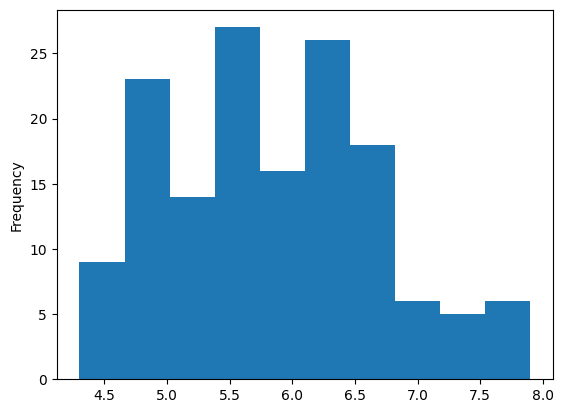

In [40]:
df['SepalLengthCm'].plot(kind = "hist")

<Axes: >

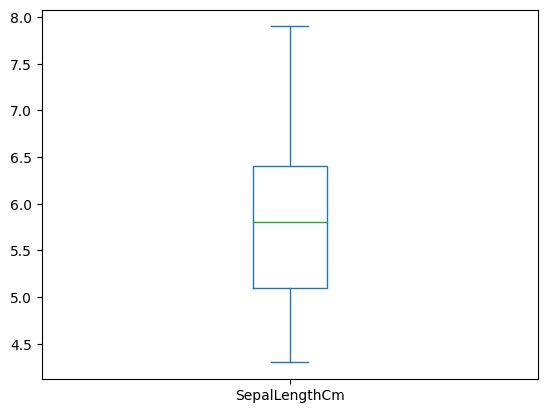

In [42]:
df['SepalLengthCm'].plot(kind = "box")

**Bar Plot**

<Axes: xlabel='Species'>

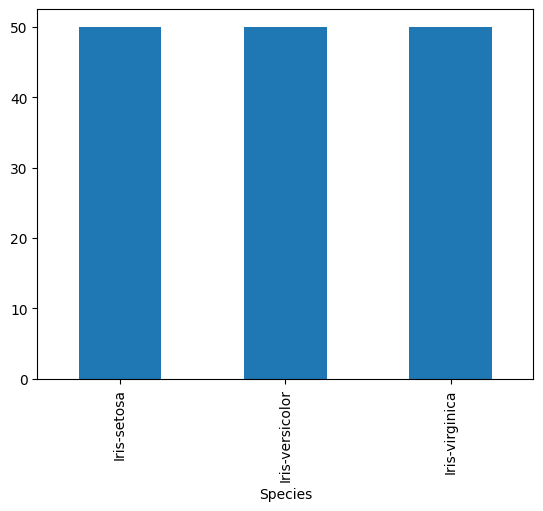

In [46]:
df["Species"].value_counts().plot(kind = "bar")

**Scatter Plot**

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

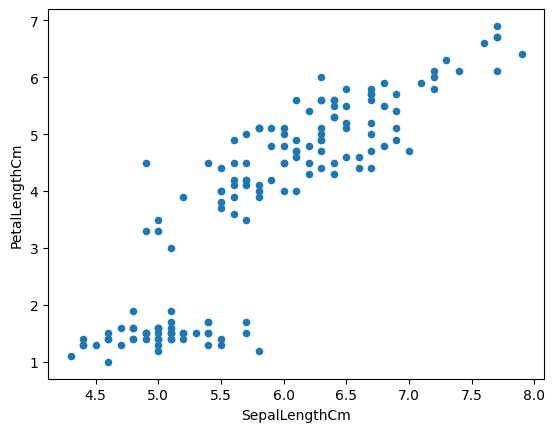

In [47]:
df.plot(x='SepalLengthCm', y ='PetalLengthCm', kind="scatter")b # bi verient plot